In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import joblib

In [2]:
df = pd.read_csv("heart.csv")
df.rename(columns=({'trestbps': 'bps', 'restecg': 'ecg', 'thalach': 'mr','exang': 'ex', 'oldpeak': 'pk'}), inplace=True)
df.head()

,age,sex,cp,bps,chol,fbs,ecg,mr,ex,pk,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

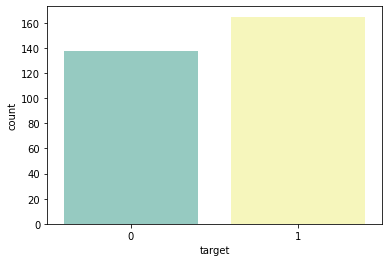

In [4]:
sns.countplot(x="target", data=df, palette="Set3")
plt.show()

In [5]:
df.groupby('target').mean()

,age,sex,cp,bps,chol,fbs,ecg,mr,ex,pk,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


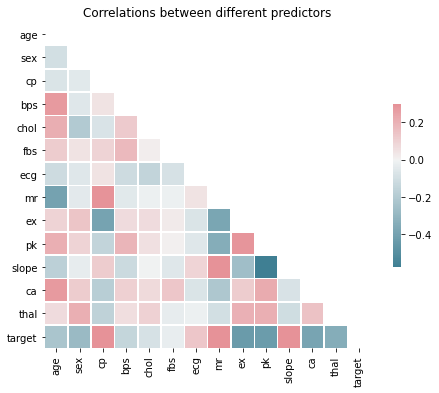

In [6]:
# Examine correlations between features
corr_df = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between different predictors')
plt.show()

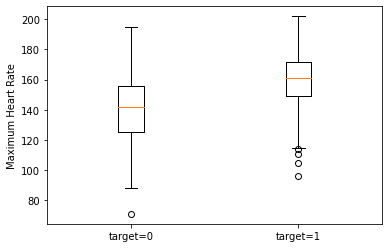

In [7]:
# Seems target is positively correlation with mr, 
# Check target relationship with Maximum Heart Rate
box_plot_data=[df.mr[df.target==0], df.mr[df.target==1]]
plt.boxplot(box_plot_data, labels=['target=0','target=1'])
plt.ylabel("Maximum Heart Rate")
plt.show()

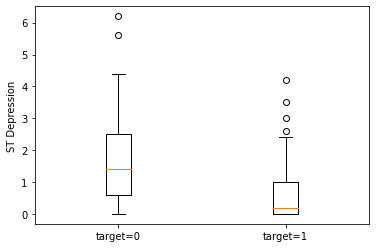

In [8]:
# Target relationship with ST depression (oldpeak)
box_plot_data=[df.pk[df.target==0], df.pk[df.target==1]]
plt.boxplot(box_plot_data, labels=['target=0','target=1'])
plt.ylabel("ST Depression")
plt.show()

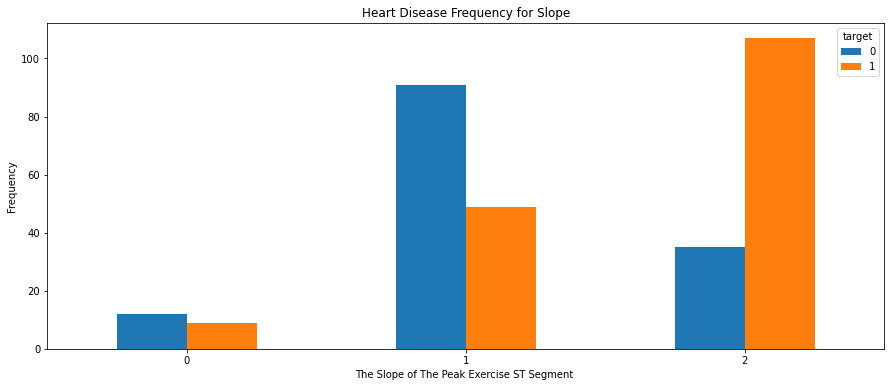

In [9]:
# explore slope
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

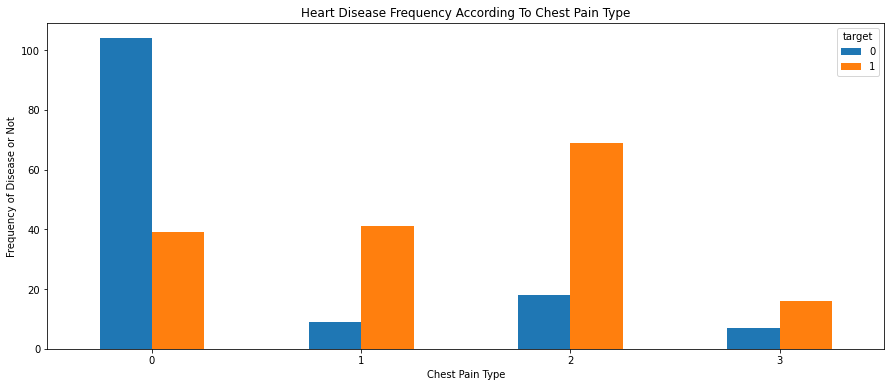

In [10]:
# explore type of pain
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [11]:
# Prepare
y = df.target.values
x_data = df.drop(['target'], axis = 1)
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
# Split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)

(242, 13)
(61, 13)


In [12]:
##Classifiers with default parameters
# Linear Regression is usually the first model to try
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print("Linear Regression - Test Accuracy: {:.2f}%".format(linear_regression.score(X_test,y_test)*100))
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)
print("Logistic Regression - Test Accuracy: {:.2f}%".format(logistic_regression.score(X_test,y_test)*100))
# SVM
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
print("SVM - Test Accuracy: {:.2f}%".format(svm.score(X_test,y_test)*100))
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
print("Naive Bayes - Test Accuracy: {:.2f}%".format(naive_bayes.score(X_test,y_test)*100))
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
print("Decision Tree - Test Accuracy: {:.2f}%".format(decision_tree.score(X_test, y_test)*100))
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print("KNN (with k = 5) - Test Accuracy: {:.2f}%".format( knn.score(X_test, y_test)*100))
# Neural Network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', activation='relu', alpha=1e-5,hidden_layer_sizes=(5, 5), random_state=5,max_iter=10,verbose=10,learning_rate_init=.1)
# We may test different parameters
#mlp = MLPClassifier(solver='lbfgs', activation='logistic', alpha=1e-4, hidden_layer_sizes=(50, 50), random_state=5,max_iter=10,verbose=10,learning_rate_init=.1)
mlp.fit(X_train, y_train)
print("Neural Network - Test Accuracy: {:.2f}%".format( mlp.score(X_test, y_test)*100))

Linear Regression - Test Accuracy: 58.38%
Logistic Regression - Test Accuracy: 88.52%
SVM - Test Accuracy: 90.16%
Naive Bayes - Test Accuracy: 86.89%
Decision Tree - Test Accuracy: 83.61%
KNN (with k = 5) - Test Accuracy: 80.33%
Neural Network - Test Accuracy: 90.16%


/Users/ngjaveri/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


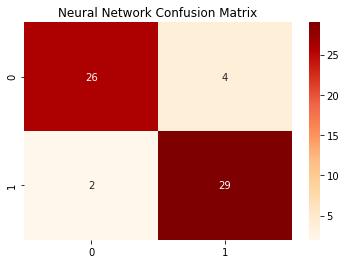

In [13]:
from sklearn.metrics import confusion_matrix
y_nn = mlp.predict(X_test)
cm_Neural_Network = confusion_matrix(y_test,y_nn)

ax= plt.subplot()
sns.heatmap(cm_Neural_Network, annot=True, cmap="OrRd", ax = ax); #annot=True to annotate cells
plt.title("Neural Network Confusion Matrix")
plt.show()

In [14]:
joblib.dump(mlp,"ModelHeart")

['ModelHeart']